# Introduction to Data Science: Data Cleaning

In [1]:
import json
import requests
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

## Functions

In [2]:
def grab_json(req, key=False):
    """
    Grab info specified in `spec.json`.
    
    req: str
    Returns: dict
    """
    api = "https://api.opendota.com/api"
    req = api + req
    payload = {}
    if key:
        with open("api_key.txt") as f:
            key = f.read()
        payload['api_key'] = key
        
    r = requests.get(req, params=payload)
    return r.json()

## Organize Player Data

In [3]:
player = pd.DataFrame(grab_json("/players/37244929/recentMatches"))
player.columns

Index(['match_id', 'player_slot', 'radiant_win', 'duration', 'game_mode',
       'lobby_type', 'hero_id', 'start_time', 'version', 'kills', 'deaths',
       'assists', 'skill', 'xp_per_min', 'gold_per_min', 'hero_damage',
       'tower_damage', 'hero_healing', 'last_hits', 'lane', 'lane_role',
       'is_roaming', 'cluster', 'leaver_status', 'party_size'],
      dtype='object')

In [4]:
player = player[["hero_id", "kills", "deaths", "assists", "skill", "xp_per_min", "gold_per_min", "hero_damage",
        "tower_damage", "hero_healing", "last_hits", "lane", "lane_role", "duration"]]

player.head()

,hero_id,kills,deaths,assists,skill,xp_per_min,gold_per_min,hero_damage,tower_damage,hero_healing,last_hits,lane,lane_role,duration
0,111,1,7,9,1.0,208,153,3913,68,8797,6,3.0,1.0,2033
1,111,4,6,14,2.0,375,251,5935,74,4007,24,1.0,1.0,2201
2,64,7,6,20,2.0,509,341,22915,1254,0,84,3.0,1.0,2982
3,111,3,8,22,NaN,515,278,9379,265,10056,28,5.0,4.0,2500
4,111,7,8,9,NaN,336,233,12975,161,15955,34,1.0,1.0,3201


In [5]:
# TODO: make gpm, kpm, lpm

## Organize Hero Data

In [24]:
heroes = pd.DataFrame(grab_json("/heroStats"))
heroes = heroes[["id", "localized_name", "primary_attr", "attack_type", "base_health", "base_health_regen", "base_mana",
        "base_mana_regen", "base_armor", "base_mr", "base_attack_min", "base_attack_max", "base_str",
        "base_agi", "base_int", "str_gain", "int_gain", "attack_range", "projectile_speed", "attack_rate",
        "move_speed", "turn_rate"]]

heroes.head()

,id,localized_name,primary_attr,attack_type,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,...,base_str,base_agi,base_int,str_gain,int_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,Anti-Mage,agi,Melee,200,0.25,75,0.0,-1.0,25,...,23,24,12,1.3,1.8,150,0,1.4,310,0.5
1,2,Axe,str,Melee,200,2.75,75,0.0,-1.0,25,...,25,20,18,3.6,1.6,150,900,1.7,310,0.6
2,3,Bane,int,Ranged,200,NaN,75,0.0,1.0,25,...,23,23,23,2.6,2.6,400,900,1.7,305,0.6
3,4,Bloodseeker,agi,Melee,200,NaN,75,0.0,2.0,25,...,24,22,18,2.7,1.7,150,900,1.7,300,0.5
4,5,Crystal Maiden,int,Ranged,200,NaN,75,1.0,-1.0,25,...,18,16,14,2.2,3.3,600,900,1.7,275,0.5


### Turn json dictionary of hero data into pandas dataframe

In [26]:
hero_ids = list(heroes["id"])
stats = ['gold_per_min', 'xp_per_min', 'kills_per_min', 'last_hits_per_min', 'hero_damage_per_min', 'tower_damage']

hero_stats = []
for i, hero_id in enumerate(hero_ids):
    hero = grab_json(f"/benchmarks/?hero_id={hero_id}", key=True)
    output = {}
    output["id"] = hero_id
    output["localized_name"] = heroes.loc[i, "localized_name"]
    for stat in stats:
        output[stat] = hero['result'][stat][4]['value']
    hero_stats.append(output)
    
hero_stats = pd.DataFrame(hero_stats)
hero_stats

,id,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,1,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721
1,2,Axe,406,559,0.185471,4.185137,532.148438,962
2,3,Bane,262,437,0.078560,0.758853,271.457801,350
3,4,Bloodseeker,490,641,0.227488,5.829545,631.144481,2797
4,5,Crystal Maiden,281,434,0.080754,1.357814,360.614224,299
5,6,Drow Ranger,494,617,0.190880,6.192893,588.543165,5347
6,7,Earthshaker,315,490,0.096899,2.207732,403.838384,465
7,8,Juggernaut,534,663,0.207809,7.174571,581.085044,4811
8,9,Mirana,331,494,0.120289,2.486884,374.505988,1015
9,10,Morphling,535,677,0.238569,7.009346,633.249097,5755


## Basic Plotting + Clustering

### Add hero type information

In [27]:
# hero_stats["primary_attr"] = heroes["primary_attr"]
hero_stats.insert(0, "Primary Attribute", heroes["primary_attr"])
hero_stats.head()

,Primary Attribute,id,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,agi,1,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721
1,str,2,Axe,406,559,0.185471,4.185137,532.148438,962
2,int,3,Bane,262,437,0.078560,0.758853,271.457801,350
3,agi,4,Bloodseeker,490,641,0.227488,5.829545,631.144481,2797
4,int,5,Crystal Maiden,281,434,0.080754,1.357814,360.614224,299


### PCA without normalization

In [29]:
palette = ["green", "red", "blue"]  # for plotting based on primary attribute

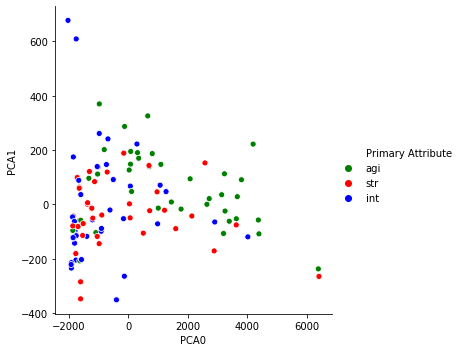

In [53]:
# clean data array
data = hero_stats.drop(["localized_name", "Primary Attribute", "id"], axis=1)

# pca
pca = PCA(n_components=2)
X_r = pca.fit(data).transform(data)

# make dataframe
pca_df = pd.DataFrame(X_r, columns=["PCA0", "PCA1"])
pca_df.insert(0, "Primary Attribute", heroes["primary_attr"])

# plot
pca1 = sns.relplot(x="PCA0", y="PCA1", hue="Primary Attribute", 
                   data=pca_df, palette=palette)
# todo / to try: different clustering methods, normalize data first, 
# figure out a way to plot so that you can figure out which hero is which
# don't plot with a huge legend

In [54]:
pca_df.head()

,Primary Attribute,PCA0,PCA1
0,agi,3634.600440,-52.694483
1,str,-1129.203438,83.884394
2,int,-1756.699190,-204.646614
3,agi,711.347858,139.164332
4,int,-1804.473081,-117.566996


### Pairplot with PCA features included

- Tower damage was almost completely linearly correlated with the first principal component
- Hero damage per minute had high linear correlation with the second

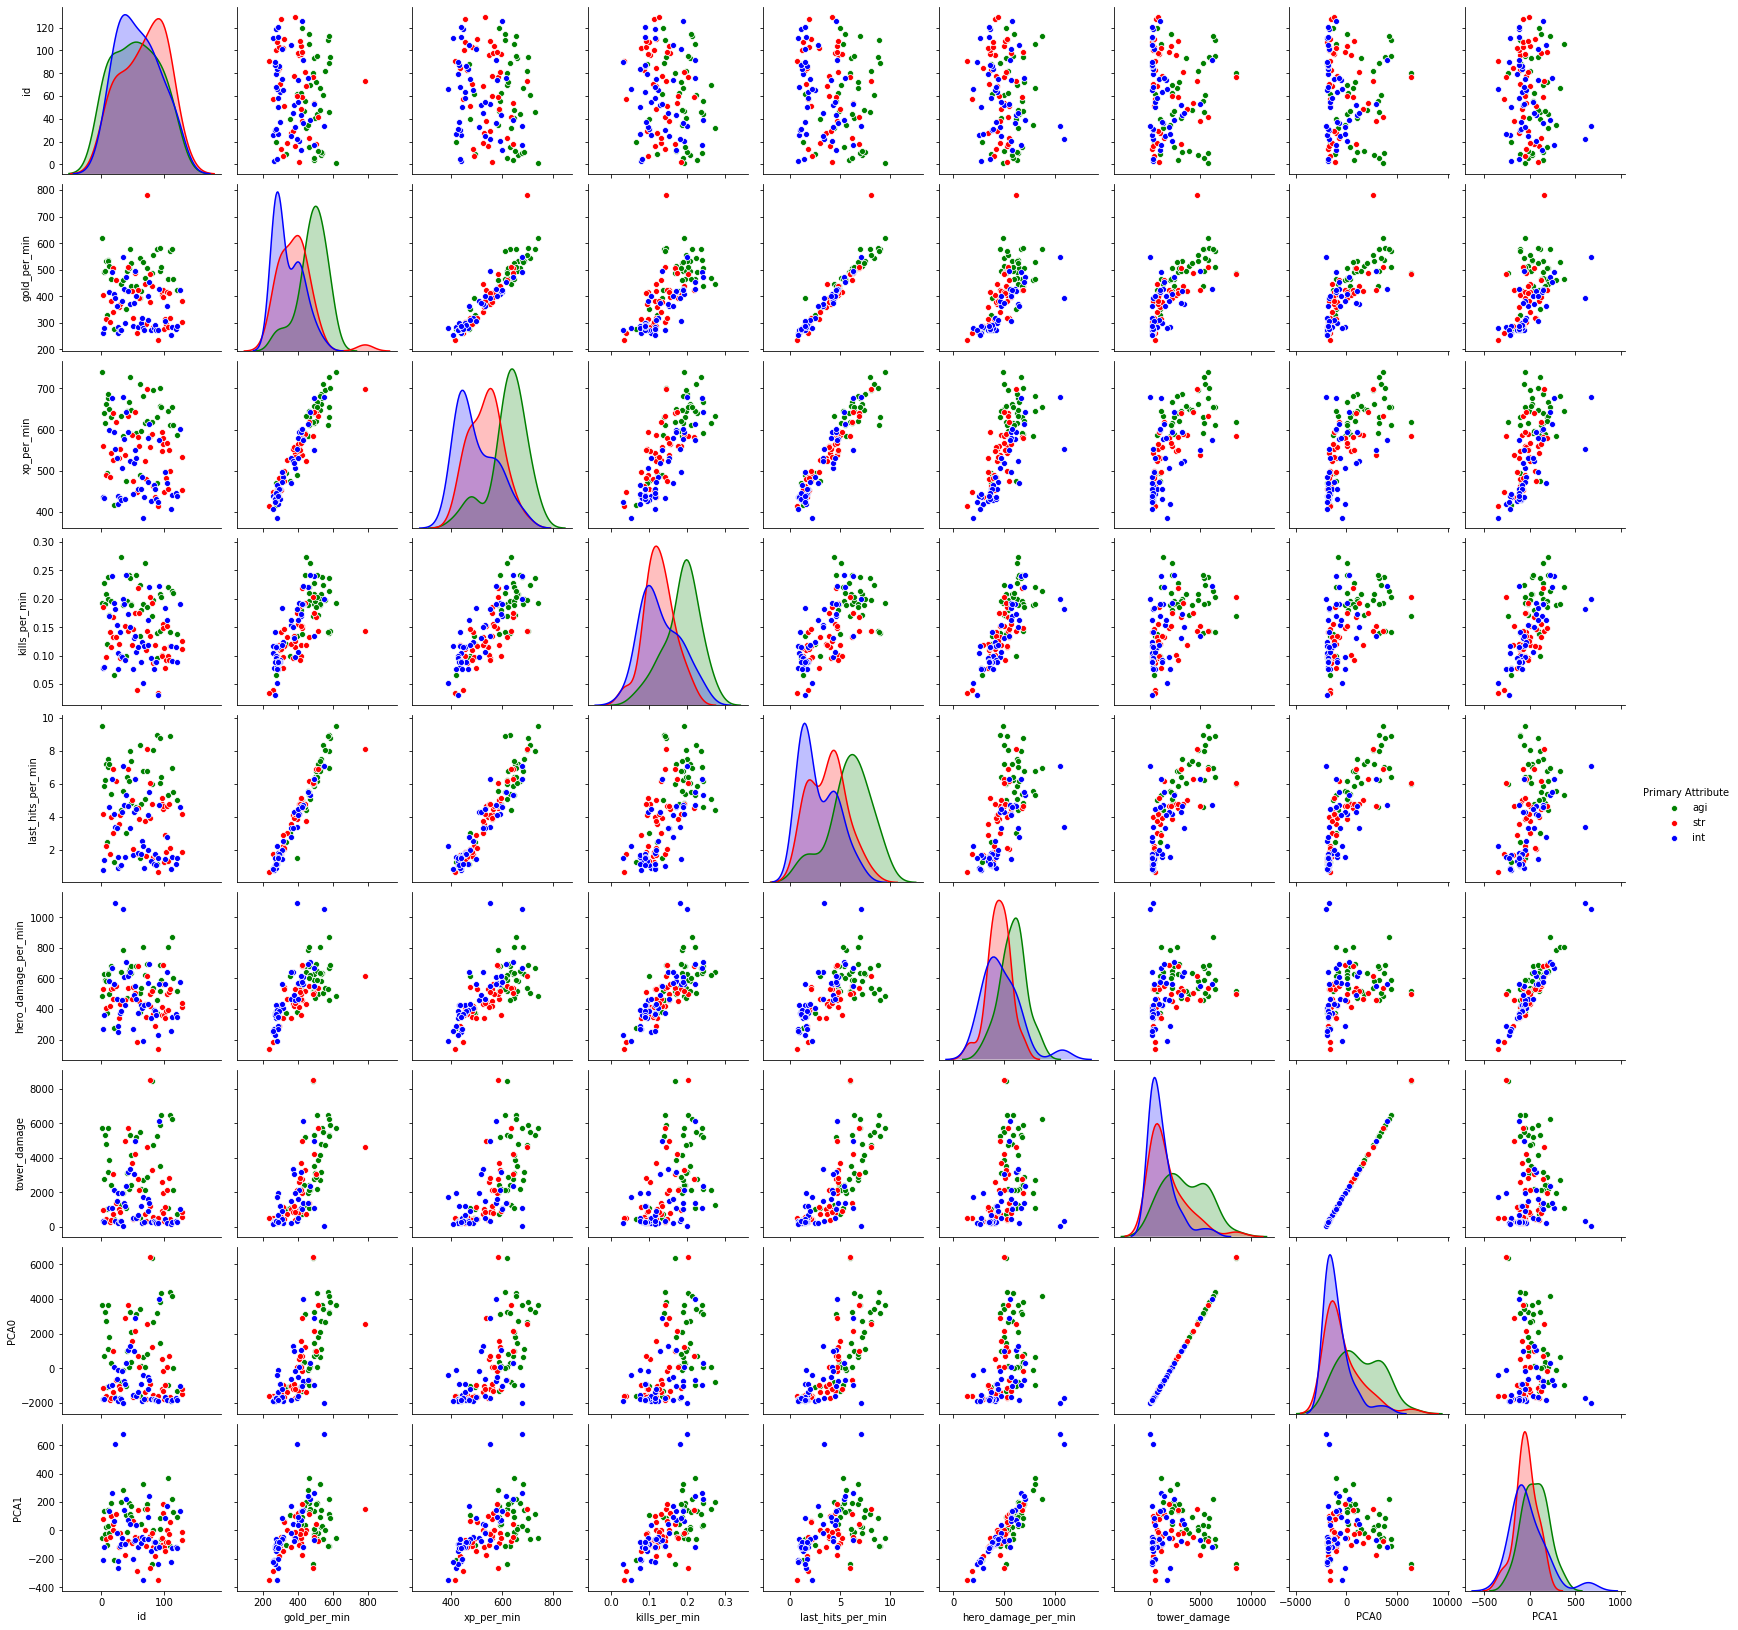

In [41]:
pairplot_data = hero_stats.drop("localized_name", axis=1)
pairplot_data["PCA0"] = pca_df["PCA0"]
pairplot_data["PCA1"] = pca_df["PCA1"]
sns.pairplot(pairplot_data, hue="Primary Attribute", 
             palette=["green", "red", "blue"])

## Need to do some preprocessing

#### Scale data to unit mean and variance

In [50]:
from sklearn import preprocessing
scaled = pd.DataFrame(preprocessing.scale(data), columns=data.columns)
scaled.head()

,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,2.122276,2.169180,0.859111,2.361482,-0.090589,1.813259
1,0.052187,0.100210,0.711566,0.032801,0.186638,-0.566107
2,-1.353911,-1.286682,-1.299649,-1.469836,-1.453109,-0.872089
3,0.872411,1.032383,1.501983,0.753976,0.809325,0.351341
4,-1.168384,-1.320786,-1.258376,-1.207155,-0.892314,-0.897588


### Looks like slightly better clustering after normalization

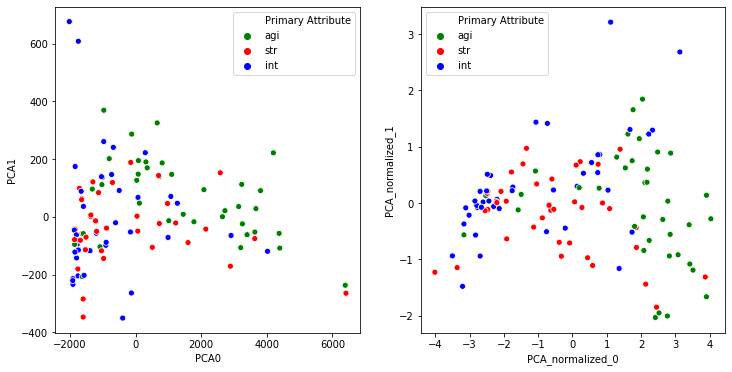

In [56]:
pca = PCA(n_components=2)
X_r = pca.fit(scaled).transform(scaled)
pca_df["PCA_normalized_0"] = X_r[:, 0]
pca_df["PCA_normalized_1"] = X_r[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x="PCA0", y="PCA1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[0])
sns.scatterplot(x="PCA_normalized_0", y="PCA_normalized_1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[1])

### Post-normalization pairplot
- before normalization, feature importance was disproportionately on tower damage and hero damage per minute
- after normalization, feature importance was more even

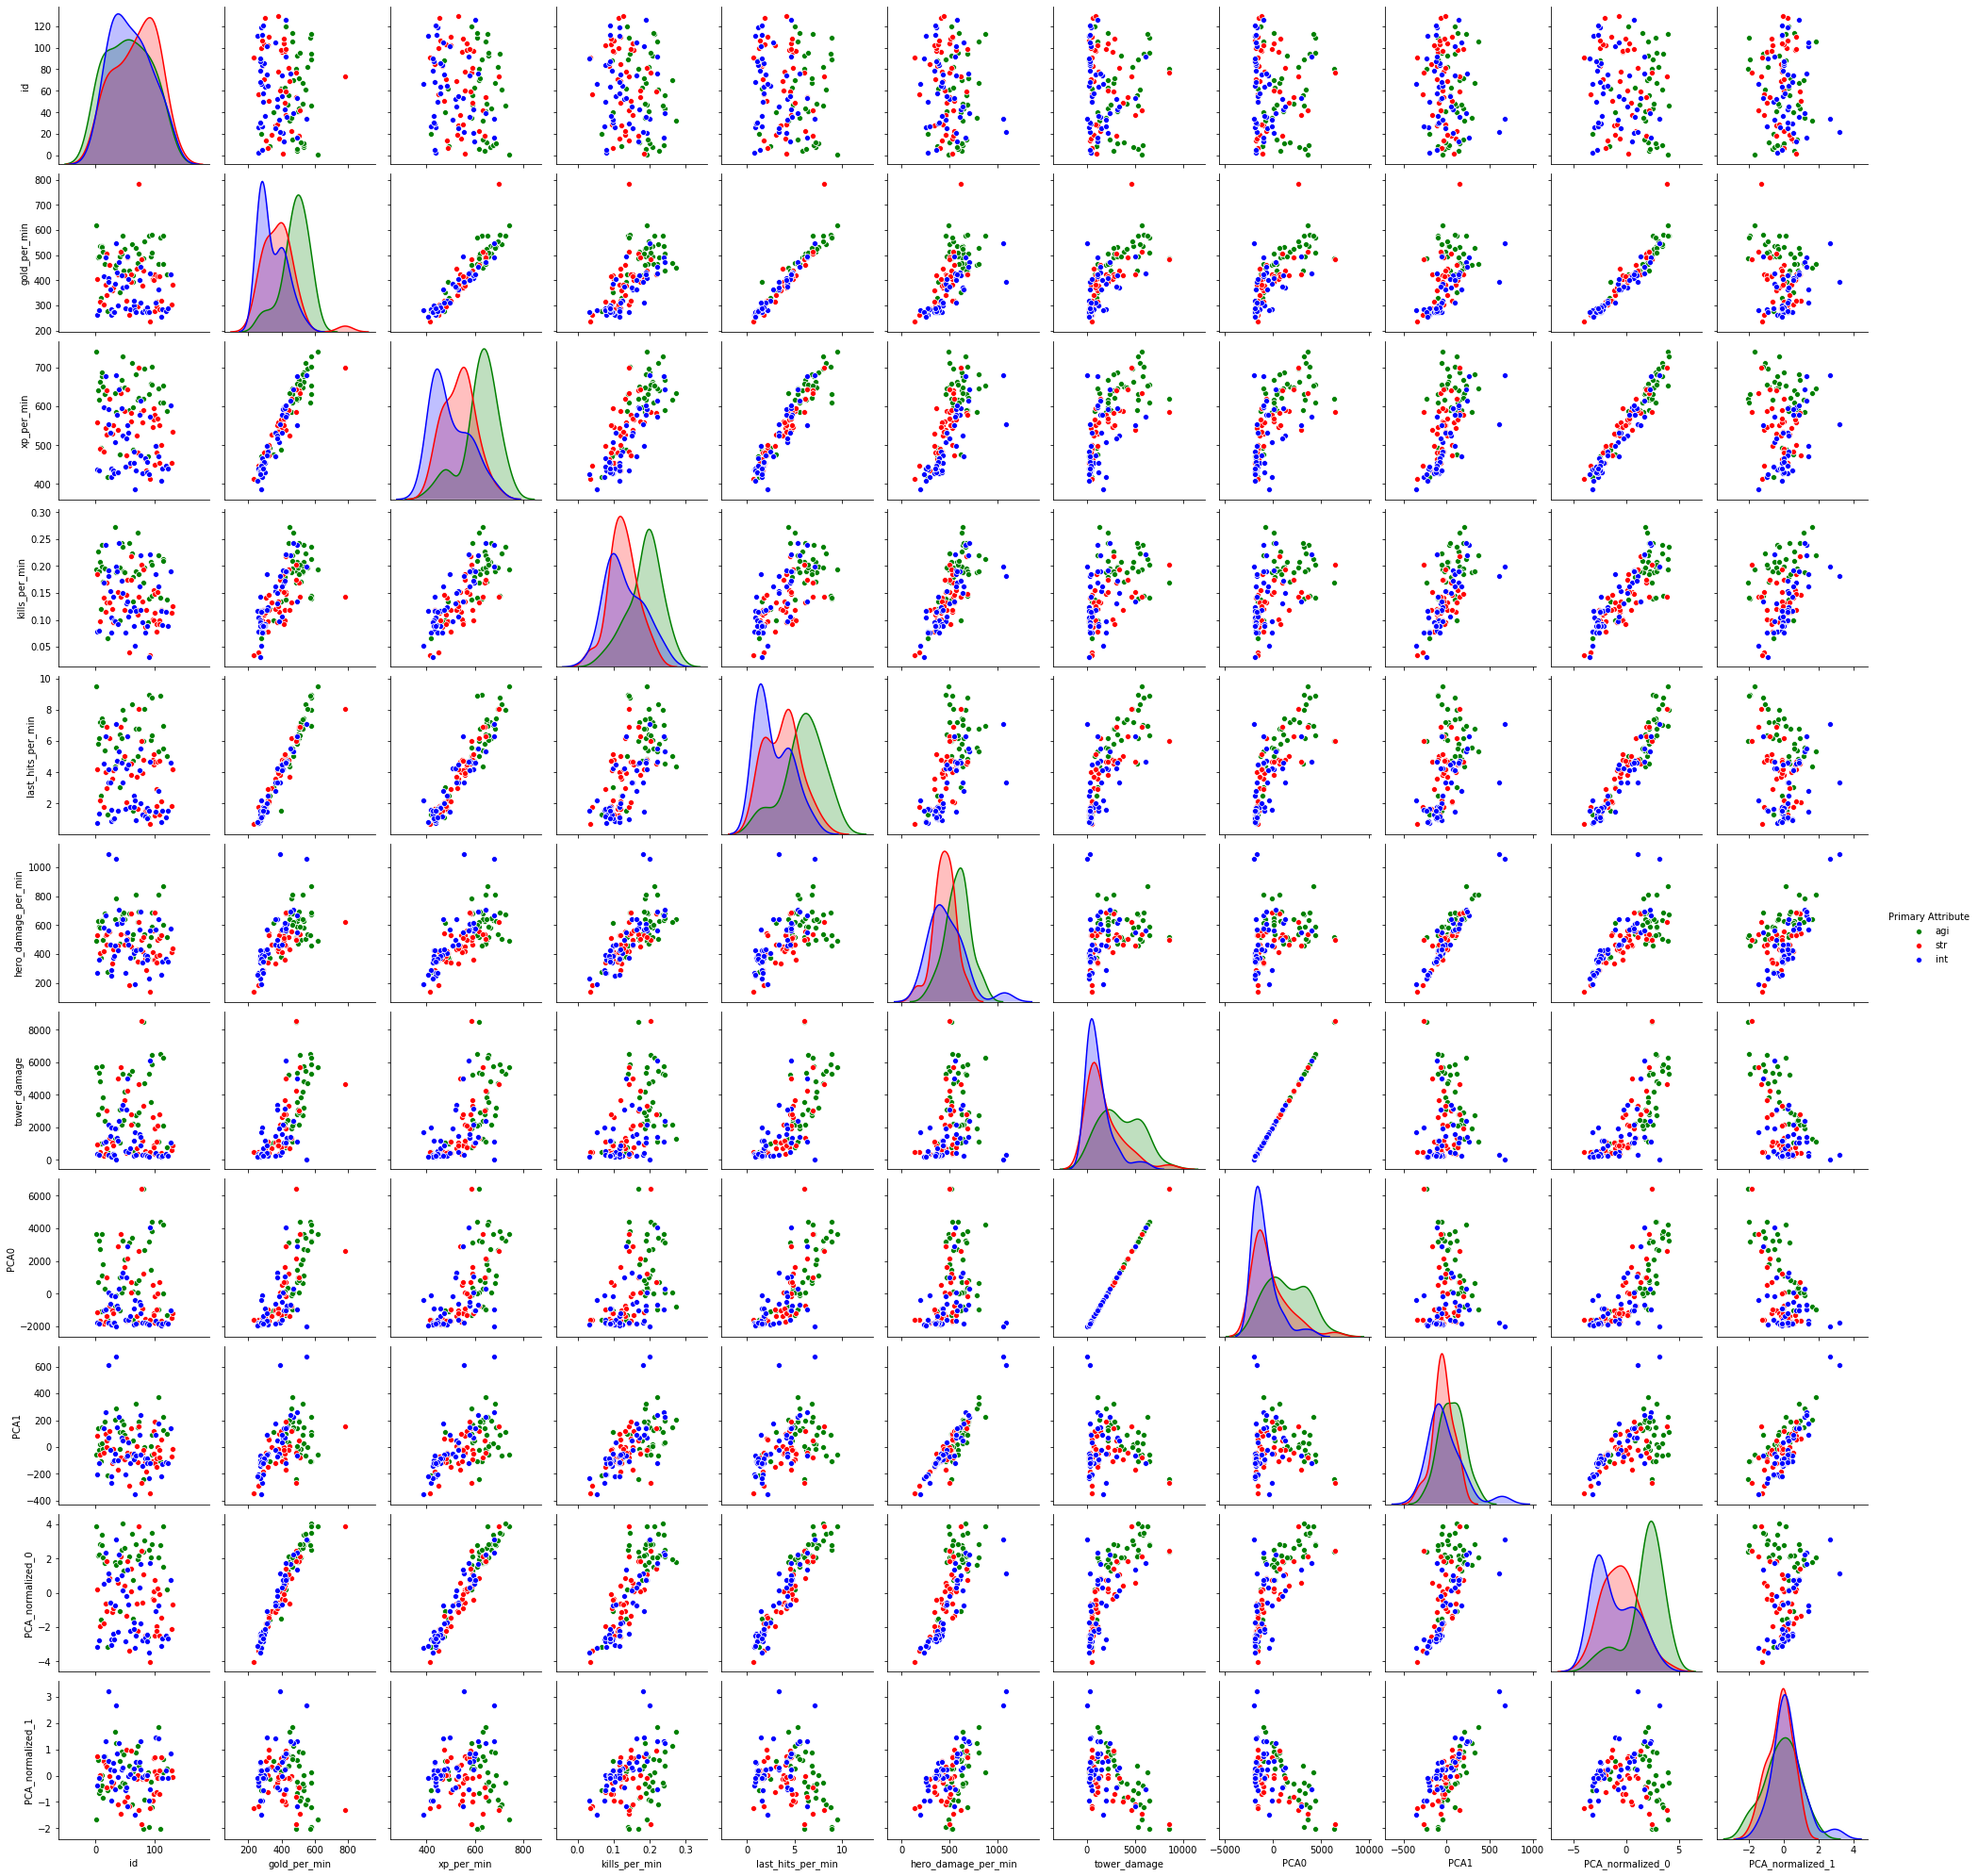

In [57]:
pairplot_data["PCA_normalized_0"] = X_r[:, 0]
pairplot_data["PCA_normalized_1"] = X_r[:, 1]
sns.pairplot(pairplot_data, hue="Primary Attribute", 
             palette=["green", "red", "blue"])

### Try L2 normalization

In [58]:
l2scaled = pd.DataFrame(preprocessing.normalize(scaled, norm='l2'), columns=data.columns)
l2scaled.head()

,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,0.489204,0.500016,0.198033,0.544343,-0.020882,0.417973
1,0.055775,0.107100,0.760488,0.035056,0.199470,-0.605028
2,-0.423714,-0.402675,-0.406733,-0.459994,-0.454759,-0.272925
3,0.374394,0.443046,0.644575,0.323568,0.347321,0.150778
4,-0.419636,-0.474372,-0.451957,-0.433561,-0.320483,-0.322377


Text(0.5, 1.0, 'PCA, l2 norm')

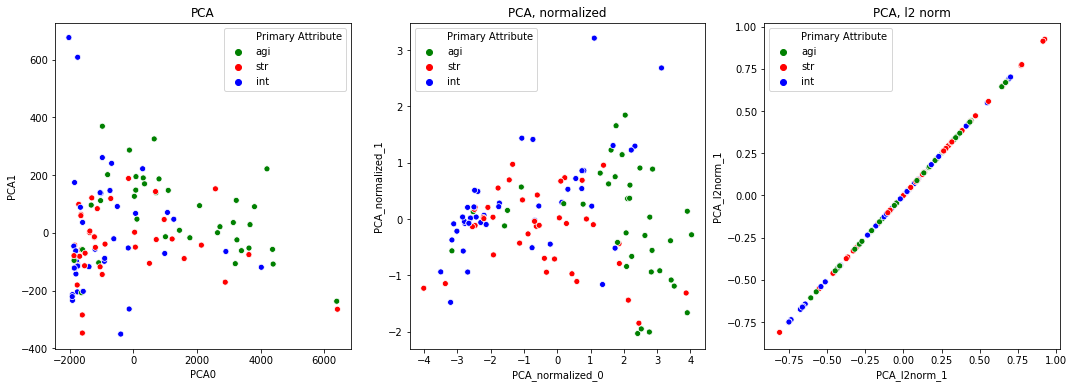

In [60]:
pca = PCA(n_components=2)
X_r = pca.fit(l2scaled).transform(l2scaled)
pca_df["PCA_l2norm_0"] = X_r[:, 0]
pca_df["PCA_l2norm_1"] = X_r[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x="PCA0", y="PCA1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[0])
sns.scatterplot(x="PCA_normalized_0", y="PCA_normalized_1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[1])
sns.scatterplot(x="PCA_l2norm_1", y="PCA_l2norm_1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[2])  # TIL L2 normalization doesn't work with PCA

axes[0].set_title("PCA")
axes[1].set_title("PCA, normalized")
axes[2].set_title("PCA, l2 norm")

## Try other dimensionality reduction algorithms, all on normalized data

### Unsupervised methods

Text(0.5, 1.0, 'ICA')

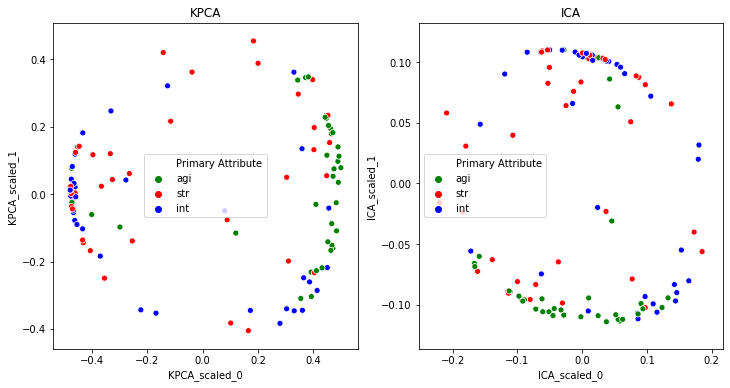

In [62]:
from sklearn.decomposition import KernelPCA, FastICA

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# KPCA
kpca = KernelPCA(kernel="rbf")
X_r = kpca.fit_transform(l2scaled)
pca_df["KPCA_scaled_0"] = X_r[:, 0]
pca_df["KPCA_scaled_1"] = X_r[:, 1]

sns.scatterplot(x="KPCA_scaled_0", y="KPCA_scaled_1", hue="Primary Attribute", 
                data=pca_df, palette=palette, ax=axes[0]);
axes[0].set_title("KPCA")

# ICA
ica = FastICA(n_components=2)
X_r = ica.fit_transform(l2scaled)
pca_df["ICA_scaled_0"] = X_r[:, 0]
pca_df["ICA_scaled_1"] = X_r[:, 1]

sns.scatterplot(x="ICA_scaled_0", y="ICA_scaled_1", hue="Primary Attribute", 
                data=pca_df, palette=palette, ax=axes[1]);
axes[1].set_title("ICA")

### Supervised methods

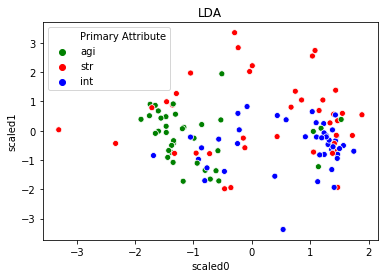

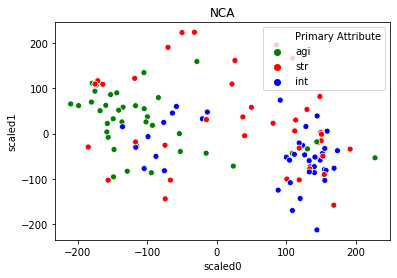

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.model_selection import train_test_split

# encode attribute labels as integers
le = LabelEncoder()
y = le.fit_transform(hero_stats["Primary Attribute"])

# # Divide into training/testing data
X_train, X_test, y_train, y_test = train_test_split(l2scaled, y)

# make models
lda = LinearDiscriminantAnalysis(n_components=2)
nca = NeighborhoodComponentsAnalysis(n_components=2)

# list out dimensionality reduction methods
dim_reduction_methods = [('LDA', lda), ('NCA', nca)]

# make models
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    
    # fit
    model.fit(X_train, y_train)
    X_r = model.transform(l2scaled)

    # plot
    df = pd.DataFrame(X_r, columns=["scaled0", "scaled1"])
    df["Primary Attribute"] = hero_stats["Primary Attribute"]
    sns.scatterplot(x="scaled0", y="scaled1", hue="Primary Attribute", 
                    data=df, palette=palette)
    plt.title(name)